# Support Vector Machine (SVM)
In this assignment, you will classify tweets using the SVM algorithm to predict their sentiment.

Please fill in your details below to help us keep track of your submission.

Student Name: `here`

Student ID: `here`

In [ ]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Run the below cell.

### Load the database and show data.

In [ ]:
import pandas as pd

path = 'sentiment.csv'

##############

data = pd.read_csv(path, encoding = "ISO-8859-1")

In [ ]:
data = data[:20000]

In [ ]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

# Step 1: Data Exploration

### Plot the labels with their corresponding numbers.

In [ ]:
plt.figure(figsize=(8, 6))
data["Sentiment"].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiments Distribution')
plt.tight_layout()

### Plot the distribution of tweets according to their lengths.

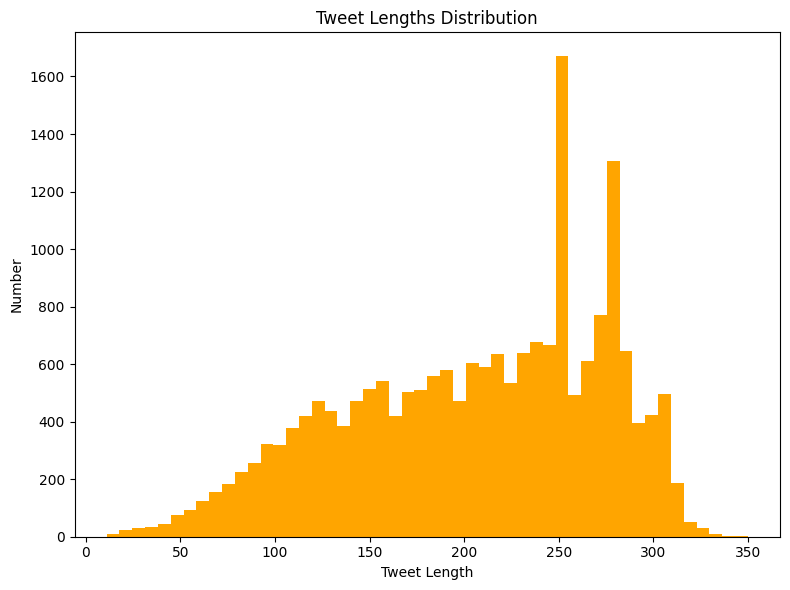

In [ ]:
data['length'] = data['OriginalTweet'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(data['length'], bins=50, color='orange')
plt.xlabel('Tweet Length')
plt.ylabel('Number')
plt.title('Tweet Lengths Distribution')
plt.tight_layout()

### Drop the rows with missing values.

In [ ]:
data = data.dropna()

### Plot the frequency of 30 most top frequent words in `negative`, `positive` classes individually.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def process_tweets(tweets):
    words = []
    for tweet in tweets:
        tokens = word_tokenize(tweet.lower())
        words.extend(tokens)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

def frequency_plot(words, title):
    word, frequency = zip(*words)
    plt.figure(figsize=(10, 6))
    plt.bar(word, frequency, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

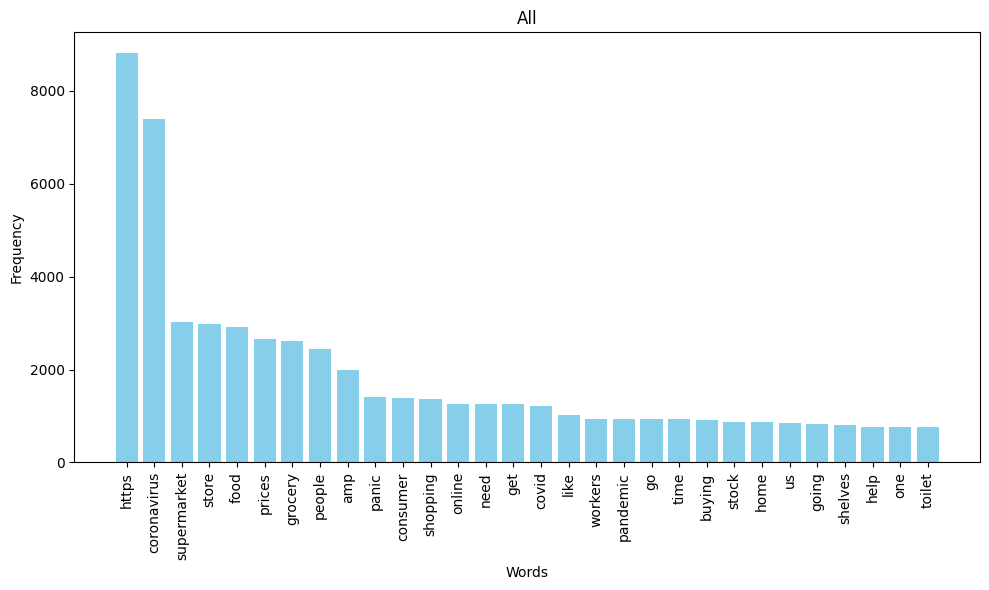

In [ ]:
all_tweet_words = process_tweets(data['OriginalTweet'])
top = Counter(all_tweet_words).most_common(30)
frequency_plot(top, 'All')

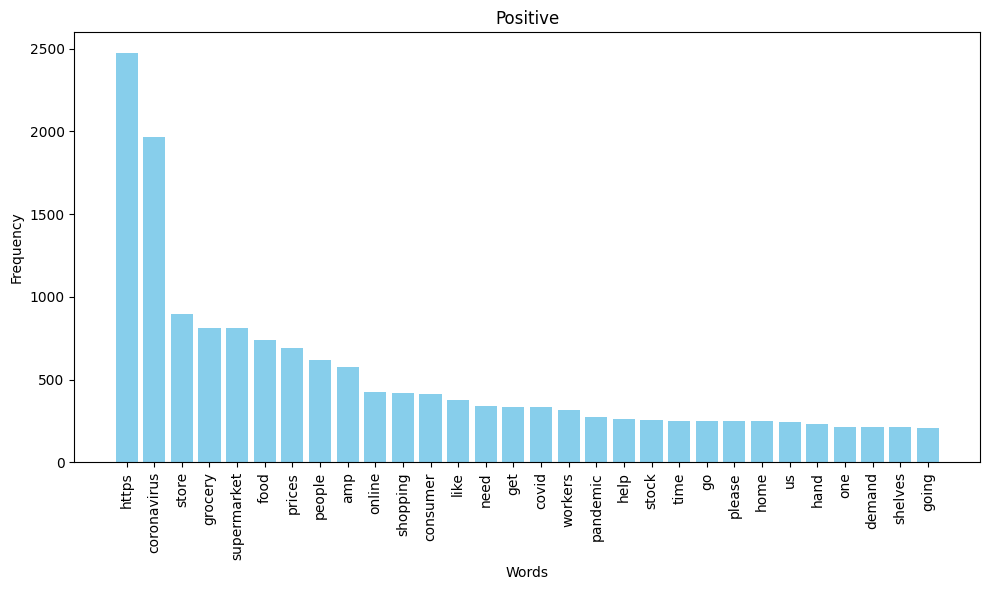

In [ ]:
positive = data[data['Sentiment'] == 'Positive']['OriginalTweet']
positive_words = process_tweets(positive)
top_positive = Counter(positive_words).most_common(30)
frequency_plot(top_positive, 'Positive')

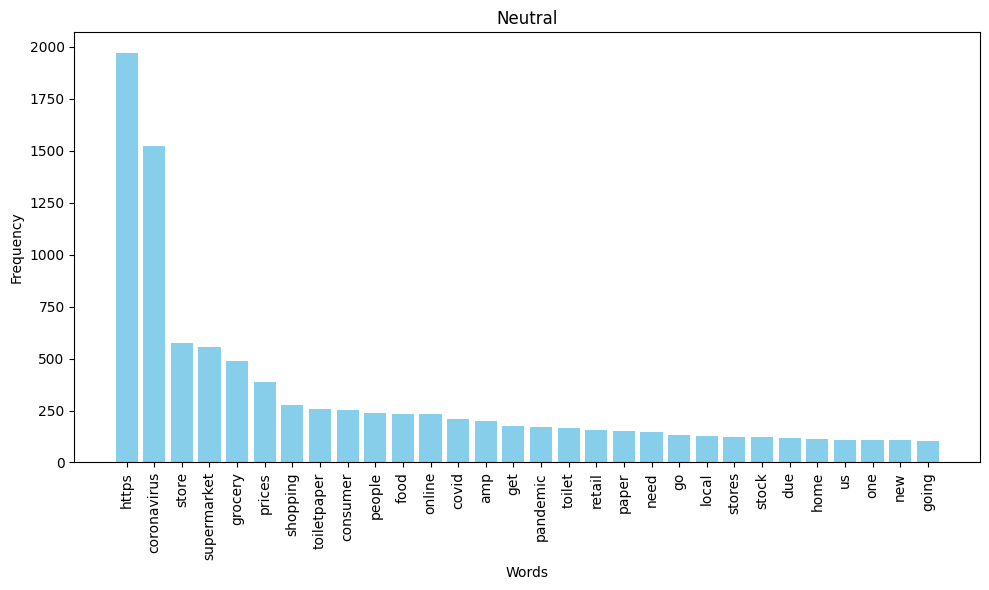

In [ ]:
neutral = data[data['Sentiment'] == 'Neutral']['OriginalTweet']
neutral_words = process_tweets(neutral)
top_neutral = Counter(neutral_words).most_common(30)
frequency_plot(top_neutral, 'Neutral')

In [ ]:
negative = data[data['Sentiment'] == 'Negative']['OriginalTweet']
negative_words = process_tweets(negative)
top_negative = Counter(negative_words).most_common(30)
frequency_plot(top_negative, 'Negative')

In [ ]:
mapping = {'Extremely Positive':'Positive', 'Extremely Negative':'Negative'}
data['Sentiment'] = data['Sentiment'].replace(mapping)
data['Sentiment'].value_counts()

Sentiment
Positive    6691
Negative    6156
Neutral     2840
Name: count, dtype: int64

# Data Preprocessing

In this part, clean the dataset using the follwoing class.

In [ ]:
stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()
stemmer = PorterStemmer()

In [ ]:
class Preprocess():
  def __init__(self, data):
      self.data = data
      self.preprocess()

  def preprocess(self):
    self.rm_irrelevant_columns()
    self.drop_duplicate()
    self.rm_links_and_tags()
    self.clean_text()
    self.replace_root()

  def rm_irrelevant_columns(self):
    # Remove the unnecessary columns
    self.data = self.data.drop('UserName', axis=1)
    self.data = self.data.drop('ScreenName', axis=1)
    self.data = self.data.drop('Location', axis=1)
    self.data = self.data.drop('TweetAt', axis=1)

  def drop_duplicate(self):
    # Drop duplicate rows
    self.data = self.data.drop_duplicates(subset=None,
                                          keep=False,
                                          inplace=False,
                                          ignore_index=False)

  def _rm_links_and_tags(self, text):
    # Remove links and tags
    TAG_RE = re.compile(r'https?://\S+|www\.\S+')
    text = TAG_RE.sub(' ', text)
    return text

  def rm_links_and_tags(self):
    # Apply above function on data
    self.data['preprocessedTweet'] = self.data['OriginalTweet'].apply(lambda x: self._rm_links_and_tags(x))

  def _clean_text(self, text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

  def clean_text(self):
    # Apply above function on data
    self.data['preprocessedTweet'] = self.data['preprocessedTweet'].apply(lambda x: self._clean_text(x))

  def _replace_root(self, text):
    # use tokenzier, stemmer, and stopwords to replce root
    tokenized = tokenizer.tokenize(text)
    preprocessed_tweets = []
    stemmed_tokens = [stemmer.stem(word) for word in tokenized if word.isalpha() and word not in stop_words]
    return ' '.join(stemmed_tokens)

  def replace_root(self):
    # Apply above function on data
    self.data['preprocessedTweet'] = self.data['preprocessedTweet'].apply(lambda x: x.lower())
    self.data['preprocessedTweet'] = self.data['preprocessedTweet'].apply(lambda x: self._replace_root(x))

In [ ]:
import re  #######

preprocess = Preprocess(data)
data = preprocess.data

In [ ]:
data.head(10)

OriginalTweet Sentiment  length  \
0   @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral     111   
1   advice Talk to your neighbours family to excha...  Positive     237   
2   Coronavirus Australia: Woolworths to give elde...  Positive     131   
5   As news of the regionÂs first confirmed COVID...  Positive     250   
6   Cashier at grocery store was sharing his insig...  Positive     180   
7   Was at the supermarket today. Didn't buy toile...   Neutral     119   
8   Due to COVID-19 our retail store and classroom...  Positive     280   
9   For corona prevention,we should stop to buy th...  Negative     267   
10  All month there hasn't been crowding in the su...   Neutral     276   
11  Due to the Covid-19 situation, we have increas...  Positive     233   

                                    preprocessedTweet  
0                         menyrbi phil gahan chrisitv  
1   advic talk neighbour famili exchang phone numb...  
2   coronaviru australia woolworth give elderli di...  
5   news region first confirm covid case came sull...  
6   cashier groceri store share insight covid prov...  
7   supermarket today buy toilet paper rebel toile...  
8   due covid retail store classroom atlanta open ...  
9   corona prevent stop buy thing cash use onlin p...  
10  month crowd supermarket restaur howev reduc ho...  
11  due covid situat increas demand food product w...

### Frequency Plot

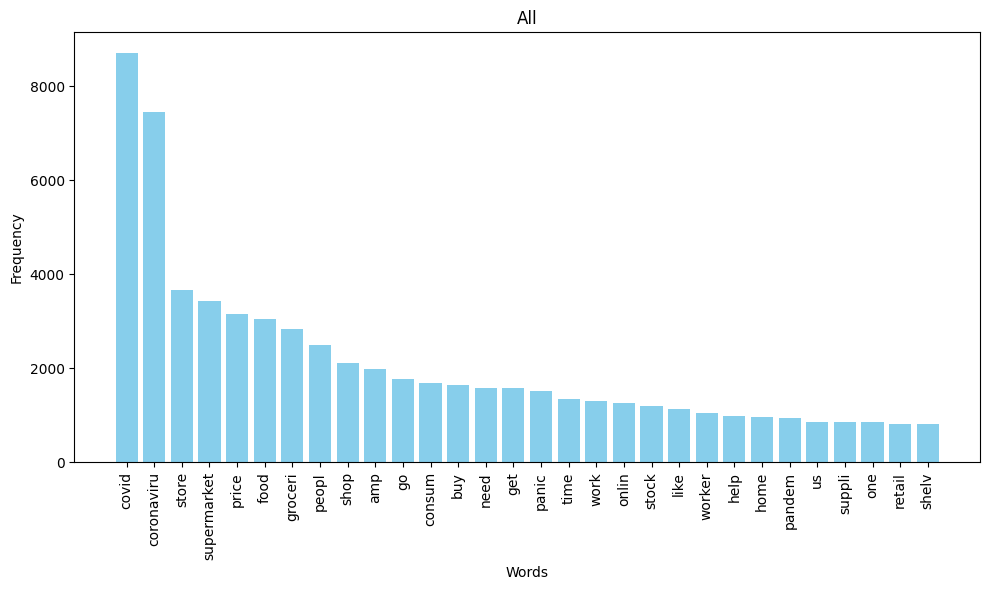

In [ ]:
all_tweet_words = process_tweets(data['preprocessedTweet'])
top = Counter(all_tweet_words).most_common(30)
frequency_plot(top, 'All')

### How does preprocessing affect the data?

## WordCloud

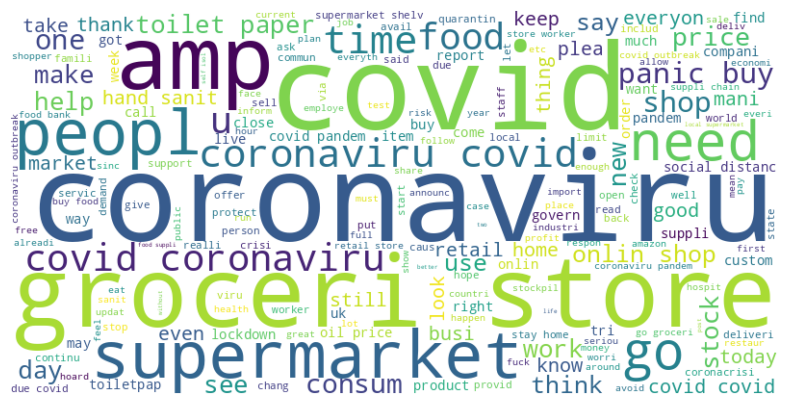

In [ ]:
text = ' '.join(data['preprocessedTweet'].astype(str))

# Now generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature generation
Construct feature vector for each tweet using `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
data = data[data['Sentiment'].str.lower() != 'neutral']
feature_vectors = vectorizer.fit_transform(data['preprocessedTweet'])
feature_vectors_array = feature_vectors.toarray()
print(feature_vectors_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Split data to train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
y = np.array(data['Sentiment'].values)

x_train, x_test, y_train, y_test = train_test_split(feature_vectors_array, y, test_size = 0.2, random_state = 50)

# SVM

### Use SVC class of `sklearn` with linear kernel.

In [ ]:
from sklearn.svm import SVC
SVC_sklearn = SVC(kernel = 'linear')

SVC_sklearn.fit(x_train, y_train)

SVC(kernel='linear')

## SVM from scratch
Using the following class, implement a SVM classifier for `Positive` and `Negative` classes.

In [ ]:
!pip install cvxopt

In [ ]:
import numpy as np
import itertools
from cvxopt import matrix, solvers

class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.bias = None

    def fit(self, X, y):
        mask = (y == 'Positive') | (y == 'Negative')
        X = X[mask]
        y = y[mask]

        y_numerical = np.where(y == 'Positive', 1, -1)

        n_samples, n_features = X.shape

        k = np.dot(X, X.T)
        P = matrix(np.outer(y_numerical, y_numerical) * k, tc='d')
        q = matrix(-np.ones(n_samples), tc='d')
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))), tc='d')
        h = matrix(np.hstack((np.zeros(n_samples), self.C * np.ones(n_samples))), tc='d')
        A = matrix(y_numerical.reshape(1, -1), tc='d')
        b = matrix(np.zeros(1))

        solution = solvers.qp(P, q, G, h, A, b)
        lagrange_multipliers = np.array(solution['x']).flatten()

        sv_indices = lagrange_multipliers > 1e-5
        self.sv = X[sv_indices]
        self.sv_labels = y_numerical[sv_indices]
        self.lagrange_multipliers = lagrange_multipliers[sv_indices]

        self.w = np.dot(self.lagrange_multipliers * self.sv_labels, self.sv)
        self.bias = np.mean(self.sv_labels - np.dot(self.w, self.sv.T))

        return self

    def transform(self, X):
        y_pred = np.sign(np.dot(X, self.w) + self.bias)
        y_pred = np.where(y_pred > 0, 'Positive', 'Negative')
        return y_pred

### Trian the SVM class with data.

In [ ]:
svm = SVM()
svm.fit(x_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -5.1889e+03 -4.3735e+04  4e+05  5e+00  2e-13
 1: -3.2078e+03 -3.5472e+04  8e+04  8e-01  2e-13
 2: -2.4972e+03 -1.7388e+04  2e+04  2e-01  1e-13
 3: -2.6588e+03 -6.1181e+03  4e+03  3e-02  1e-13
 4: -3.1078e+03 -4.5159e+03  2e+03  9e-03  1e-13
 5: -3.2832e+03 -4.1204e+03  9e+02  4e-03  1e-13
 6: -3.4118e+03 -3.8330e+03  4e+02  2e-03  1e-13
 7: -3.4819e+03 -3.6908e+03  2e+02  7e-04  1e-13
 8: -3.5141e+03 -3.6274e+03  1e+02  3e-04  1e-13
 9: -3.5386e+03 -3.5835e+03  5e+01  7e-05  1e-13
10: -3.5492e+03 -3.5663e+03  2e+01  2e-05  1e-13
11: -3.5539e+03 -3.5592e+03  5e+00  2e-06  2e-13
12: -3.5556e+03 -3.5568e+03  1e+00  3e-07  2e-13
13: -3.5561e+03 -3.5563e+03  2e-01  4e-08  2e-13
14: -3.5562e+03 -3.5562e+03  2e-02  4e-09  2e-13
15: -3.5562e+03 -3.5562e+03  1e-03  2e-10  2e-13
Optimal solution found.


# Evaluation

Apply each model on test set.

In [ ]:
from sklearn.metrics import accuracy_score
SVCsklearn_predictions = SVC_sklearn.predict(x_test)
mask = (y_test == 'Positive') | (y_test == 'Negative')
x0 = x_test[mask]
y0 = y_test[mask]

my_predictions = svm.transform(x0)

Print accuracy score of each model on test set.

In [ ]:
print(f'SVM sklearn accuracy score: {accuracy_score(y_test, SVCsklearn_predictions)}') ###########
print(f'SVM from scratch accuracy score: {accuracy_score(y0, my_predictions)}')

SVM sklearn accuracy score: 0.8210116731517509
SVM from scratch accuracy score: 0.8210116731517509


Print normalized confusion matrix of each model pridctions.

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

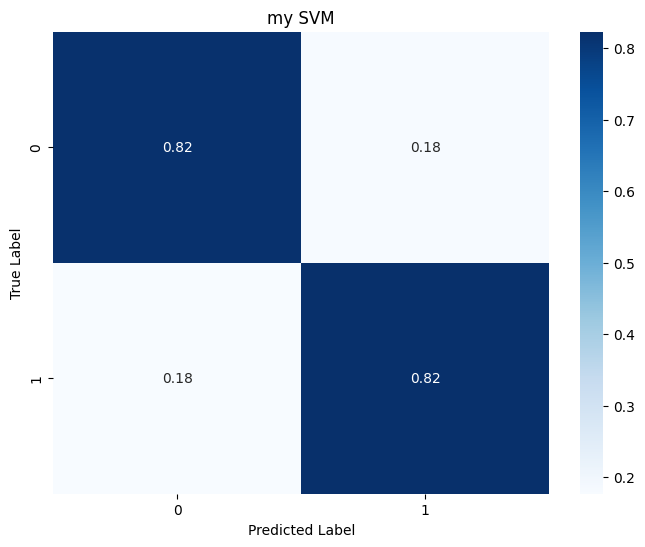

In [ ]:
y_test_numerical = np.where(y0 == 'Positive', 1, -1)
my_predictions_numerical = np.where(my_predictions == 'Positive', 1, -1)

cm_myModel = confusion_matrix(y_test_numerical, my_predictions_numerical, normalize = 'true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_myModel, annot=True, cmap='Blues', fmt='.2f')
plt.title('my SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

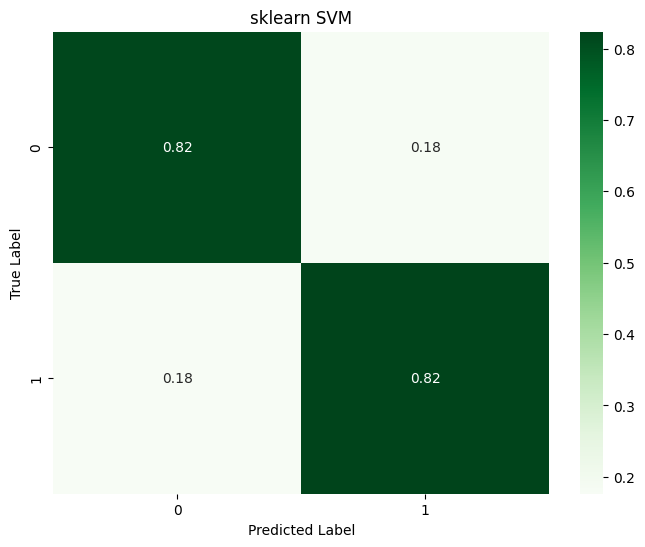

In [ ]:
cm_SVCsklearn = confusion_matrix(y_test, SVCsklearn_predictions, normalize = 'true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVCsklearn, annot=True, cmap='Greens', fmt='.2f')
plt.title('sklearn SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Non-linear Classification with Kernels in SVM

Until now, we've used **linear SVMs**, which try to find a linear decision boundary (a hyperplane) between classes. But what if the data is not linearly separable?

That's where **kernel functions** come in! Kernels allow SVMs to create non-linear decision boundaries by implicitly mapping the data to a higher-dimensional space without explicitly computing that mapping.

Common kernel functions:
- **Linear**: `K(x, y) = x ⋅ y`
- **Polynomial**: `K(x, y) = (x ⋅ y + c)^d`
- **RBF (Gaussian)**: `K(x, y) = exp(-γ ||x − y||²)`

Let's try them out!


## Import and Dataset Setup

In [ ]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Create a dataset that's not linearly separable
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Train SVM with Different Kernels

In [ ]:
# Train SVMs with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel in kernels:
    if kernel == 'poly':
      svc = SVC(kernel=kernel, degree=3, gamma='scale')
    else:
      svc = SVC(kernel=kernel, gamma='scale')
    svc.fit(X_train, y_train)
    models[kernel] = svc


## Plot Decision Boundaries

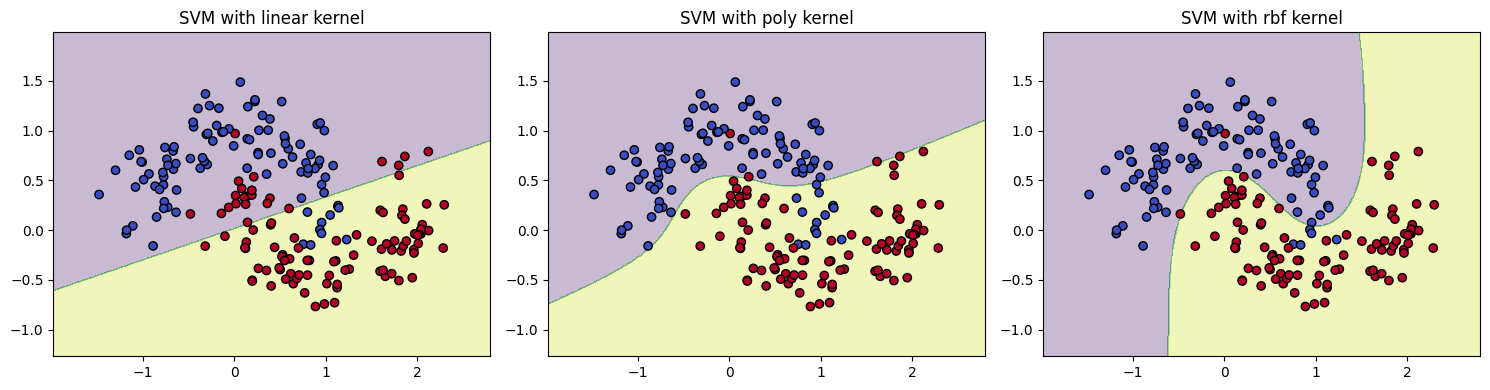

In [ ]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# Plot all models
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, kernel in enumerate(kernels):
    plot_decision_boundary(models[kernel], X, y, axs[i], f"SVM with {kernel} kernel")

plt.tight_layout()
plt.show()


## Question

Based on the decision boundaries you observed for the three kernels (linear, polynomial, RBF), answer the following:

**Which kernel would you choose for a dataset where the classes form concentric circles, and why?**

Write your answer below with a brief explanation of how the kernel helps the SVM perform well in that situation.

```
ANSWER:

I would choose the RBF (Radial Basis Function) kernel for a dataset where the
classes form concentric circles.

The RBF kernel can map data to a higher-dimensional space where circular or
radial patterns become linearly separable. It’s especially powerful for
handling non-linear relationships and complex boundaries like circles or
spirals, which cannot be separated using a straight line or even a simple
polynomial boundary.
```